Машинное обучение - это обучение на данных. Давайте поработаем с данными. Пусть у нас есть выборка (**датасет**) из 10 тысяч обучающих примеров. Нам нужно разделить ее на **K примерно равных частей** (фолдов), чтобы затем использовать эти части в кросс-валидации. Пример такой выборки:

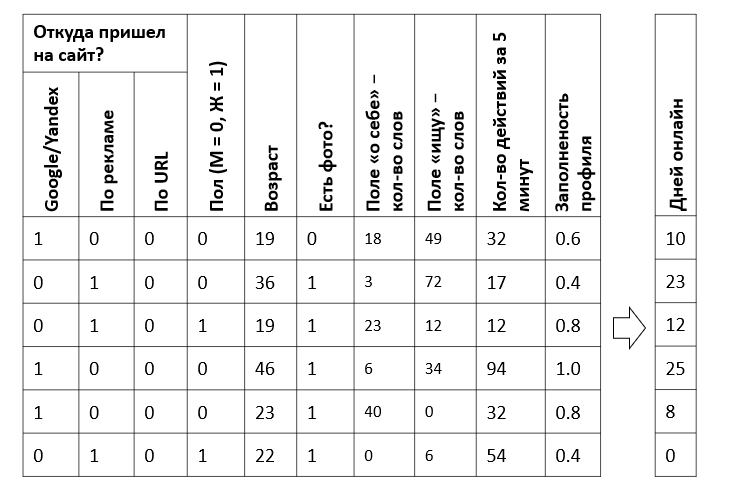

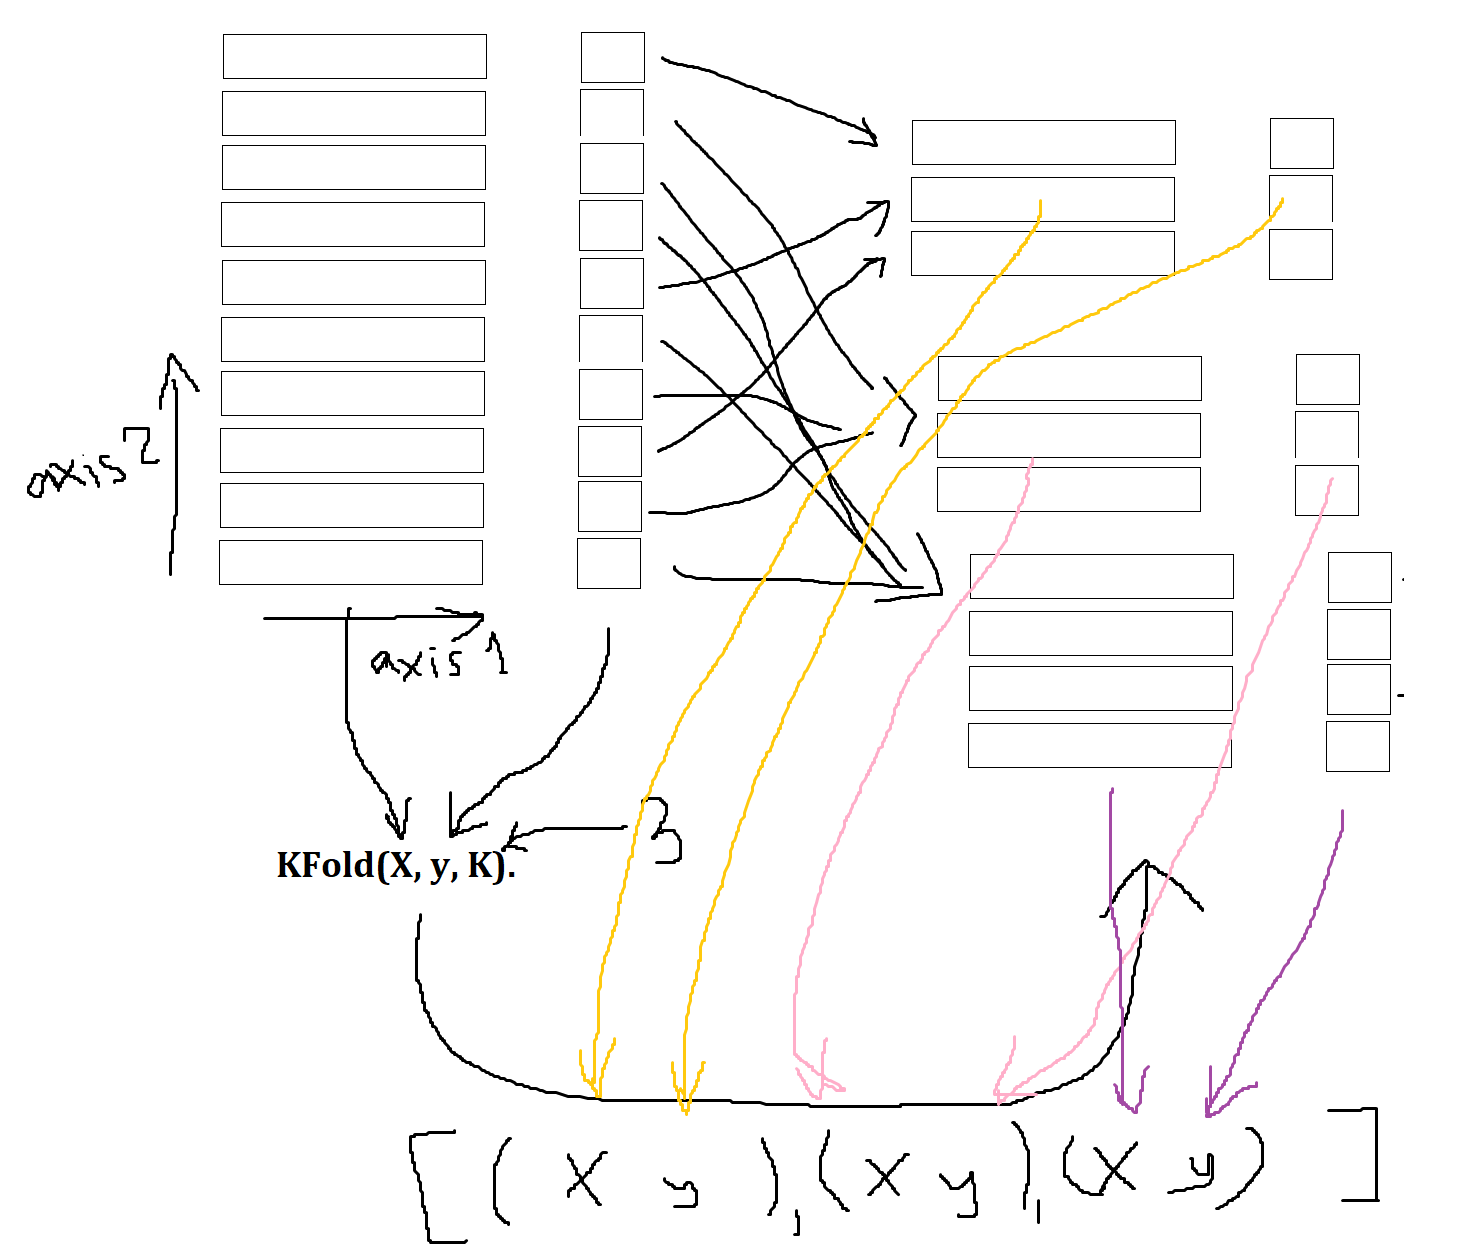

Давайте более строго сформулируем задачу.

Нам нужно написать функцию **KFold(X, y, K)**.

---

Входные данные:

**X** - двухмерный numpy-массив. Этот массив хранит исходные данные. Первый индекс - номер примера, второй индекс - номер признака.

**y** - одномерный numpy-массив. Этот массив хранит целевые данные. Индекс - номер примера.

**K** - количество частей, на которые нужно разбить массив.

---

Что нужно сделать?

Разбить каждый из двух массивов (X и y) на K частей (фолдов) так, чтобы:

1. Не нарушалось соответствие между исходными и целевыми данными.
2. Размеры всех фолдов отличались не более чем на единицу.
3. В каждый фолд должны попасть случайные примеры из исходных массивов, то есть примеры нужно перемешивать.

---

Функция должна возвращать список из пар:

**[(X1, y1), (X2, y2), ..., (Xk, yk)]**

In [ ]:
import numpy as np

def KFold(X, y, K):
  ...

Протестируем работу функции

In [ ]:
size = 20
X = np.stack([np.arange(size), np.zeros(size), np.ones(size)], axis=1)
y = np.arange(size) * 2

for K in range(1, size+1):
  print(f'Проверяем для K={K}...')
  folds = KFold(X, y, K)

  #проверяем, что возвращается список длиной K
  assert type(folds) == list
  assert len(folds) == K

  #проверяем, что каждый элемент возвращенного списка - пара из двух numpy-массивов
  for fold in folds:
    assert type(fold) == tuple
    X_part, y_part = fold
    assert type(X_part) == np.ndarray
    assert type(y_part) == np.ndarray
    assert X_part.ndim == 2
    assert y_part.ndim == 1
    #проверяем, что количество признаков в fold[0] такое же, как в X
    assert X_part.shape[1] == X.shape[1]

  #проверяем, что в каждом фолде X и y имеет одинаковую длину
  for fold_X, fold_y in folds:
    assert len(fold_X) == len(fold_y)
  
  #получаем размеры всех фолдов
  all_lengths = [len(fold_X) for fold_X, fold_y in folds]

  #проверяем, что размеры фолдов отличаются не более чем на единицу
  assert max(all_lengths) <= min(all_lengths) + 1
  
  #проверяем, что суммарная длина всех фолдов равна размеру исходных массивов (len(y) или len(X), что то же самое)
  assert sum(all_lengths) == len(y)

  #делаем конкатенацию всех фолдов обратно...
  X_restored = np.concatenate([fold_X for fold_X, fold_y in folds], axis=0)
  y_restored = np.concatenate([fold_y for fold_X, fold_y in folds], axis=0)

  #проверяем, что не нарушилось соответствие между исходными и целевыми данными
  assert (X_restored[:, 0] * 2 != y_restored).sum() == 0
  
  #проверяем, что массивы были перемешаны
  assert (y_restored != y).sum() > 0
  assert (y_restored != y[::-1]).sum() > 0

print('Ура! Все проверки пройдены!')